
# Will you get into your dream grad school?
It's always a good idea to know your chances of getting into your dream school. This notebook will help you do just that. It will help you predict your chances of getting into a university based on your some qualifications. In this notebook, I train a model to help you find out just that.

<br>
By:

> Joram Mutenge

Contact and Other Information:
>* [LinkedIn Profile](https://www.linkedin.com/in/jorammutenge/)
>* [Autobiographical Books](https://tinyurl.com/57fn858p)

<br>

### About Dataset
#### Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

#### Content
The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :

1. GRE Scores ( out of 340 )
1. TOEFL Scores ( out of 120 )
1. University Rating ( out of 5 )
1. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
1. Undergraduate GPA ( out of 10 )
1. Research Experience ( either 0 or 1 )
1. Chance of Admit ( ranging from 0 to 1 )

#### Data source
>* [Kaggle](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)

# 


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/admissions.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [69]:
# Check missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the dataset.

In [70]:
# Clean up the dataframe and alter column names.
def tweak_df(df):   
    new_cols = {'GRE Score': 'GRE_Score',
                'Chance of Admit ': 'Admit_Chance',
                'University Rating': 'University_Rating',
                'TOEFL Score': 'TOEFL_Score',
                'SOP': 'Statement_of_Purpose',
                'LOR ': 'Recommendation_Letter',
                'CGPA': 'College_GPA'}

    return (df
    .drop(columns=['Serial No.'])
    .rename(columns=new_cols)
    # .assign(College_GPA=lambda df_: df_.College_GPA/2.5)
    )

df = tweak_df(df)

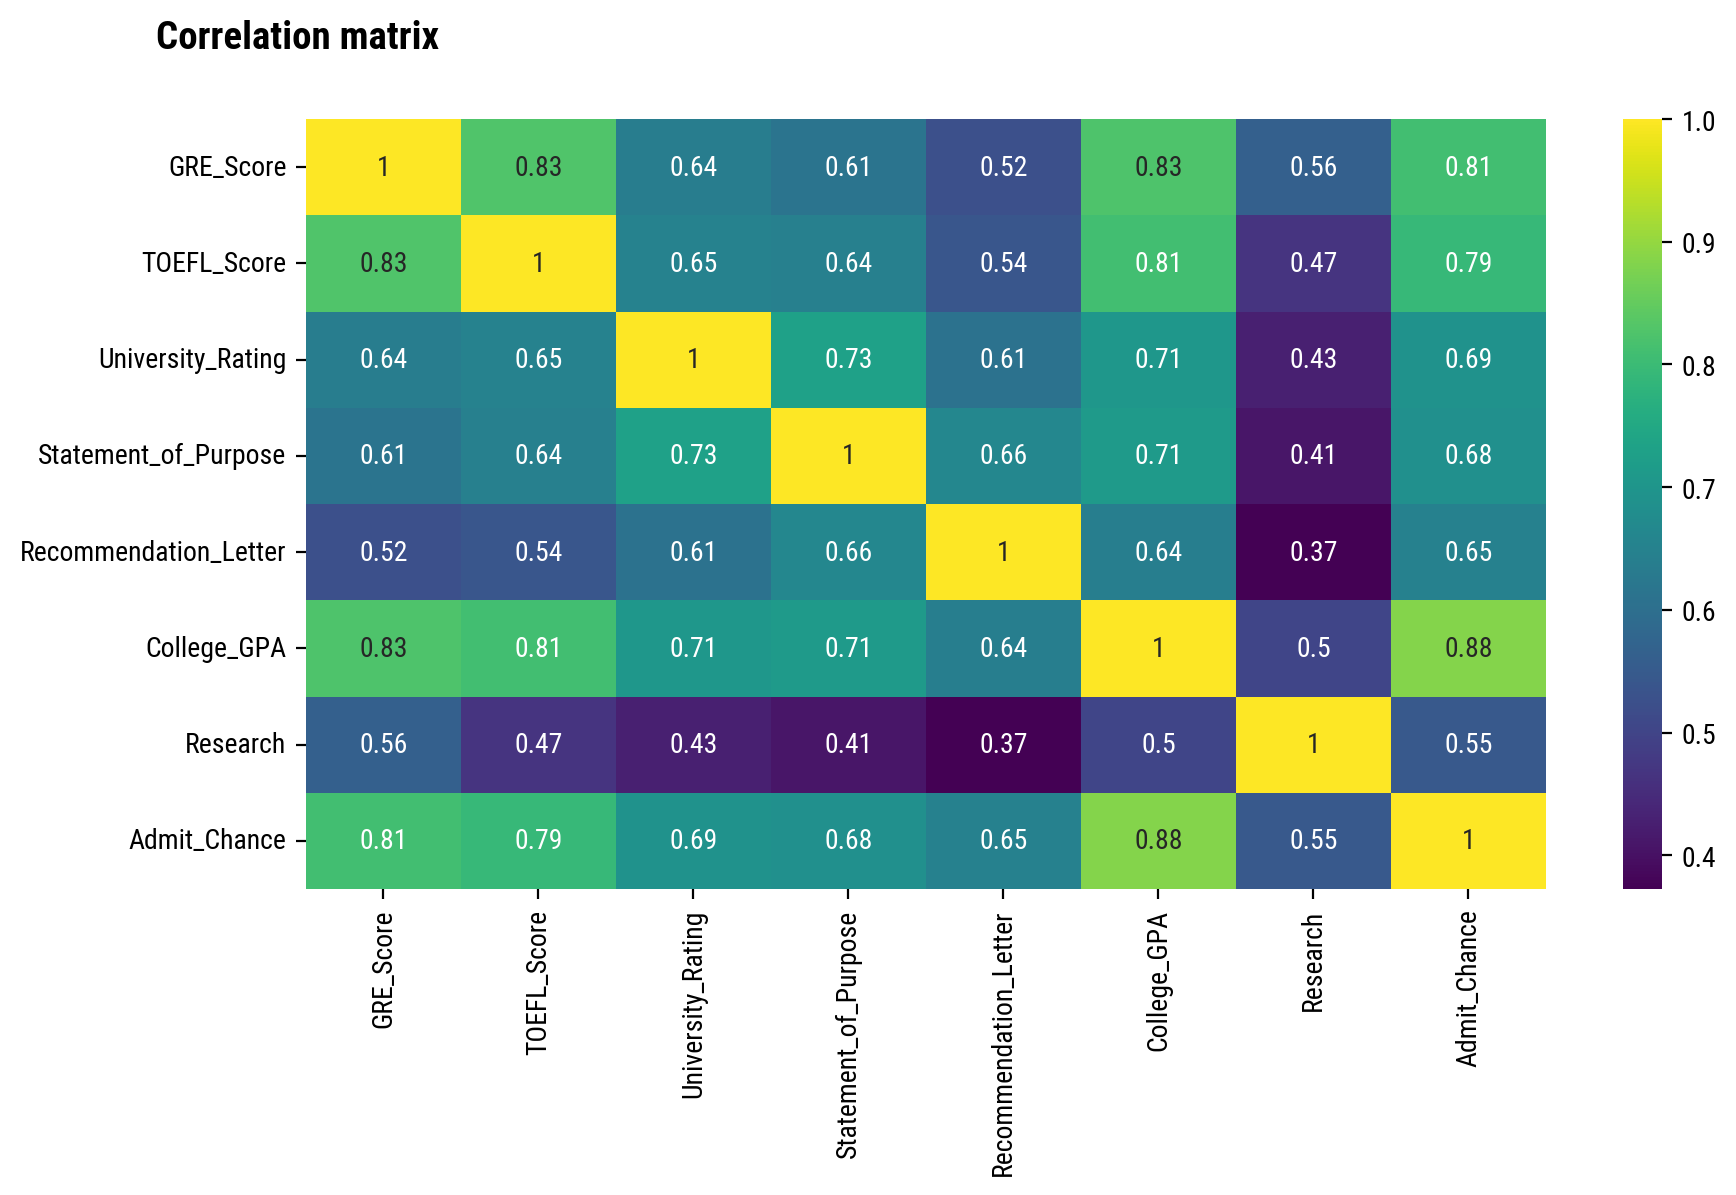

In [71]:
import seaborn as sns
plt.rcParams['font.family'] = 'Roboto Condensed'

# Visualize correlations
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
fig.suptitle('Correlation matrix', fontsize=14, fontweight='bold', x=0.05, ha='left');

In [73]:
# Get columns that have a correlation coefficient greater than 0.69
def get_correlated_cols(dataframe, target_column, threshold=float):
    """Get columns that are correlated with the target column"""
    corr_matrix = dataframe.corr()
    correlated_columns = corr_matrix[abs(corr_matrix[target_column]) >= threshold].index.tolist()
    correlated_columns.remove(target_column)
    return correlated_columns

# Get correlated columns
correlated_columns = get_correlated_cols(df, 'Admit_Chance', 0.69)
print(correlated_columns)


['GRE_Score', 'TOEFL_Score', 'University_Rating', 'College_GPA']


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the relevant columns from the dataframe
selected_columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'College_GPA']
X = df[selected_columns]
y = df['Admit_Chance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest model
rf_model = RandomForestRegressor(n_estimators=300,
                                 random_state=42,
                                 max_depth=6,
                                 min_samples_leaf=0.01,
                                 n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'     Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

     Mean Squared Error: 0.004236513527475967
Root Mean Squared Error: 0.06508850534062037


In [75]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_model.joblib')


['rf_model.joblib']

## Try out the Web App:
__Note:__ The first load may take about 2 minutes.
> [Web App](https://admit-chance-predictor.onrender.com)